In [1]:
pip install lime


Note: you may need to restart the kernel to use updated packages.


**Importing the neccessary libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)

from imblearn.over_sampling import SMOTE
import shap
import lime
import lime.lime_tabular



ModuleNotFoundError: No module named 'xgboost'

**Loading the data set**

In [42]:
df = pd.read_csv("diabetes.csv")

**Initial Data Exploration**

In [43]:
# Display the first 5 rows of the DataFrame `df` to quickly inspect the structure of the dataset.
#
# Purpose:
# - Verify that the data has been loaded correctly from the source (e.g., CSV, database, etc.).
# - Get an initial look at the columns, their names, and data types.
# - Identify any obvious data quality issues (e.g., missing values, unexpected formatting).
#
# Parameters:
# - By default, .head() displays the first 5 rows, but you can specify a number, e.g., df.head(10) to see more.
#
# Example:
# If df has 10,000 rows, df.head() will still only display the first 5 rows without altering the dataset.
#
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Exploratory Data Analysis (EDA)**

EDA is a data analysis approach used to summarize and understand the main characteristics of a dataset.

In [44]:
# The df.info() method provides a concise summary of the DataFrame.
# It is extremely useful for quickly understanding the structure of the dataset.
# This function is useful for:
# - Detecting missing values quickly.
# - Understanding the type of each column before preprocessing.
# - Deciding whether data type conversions are needed to optimize memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
# Descriptive statistics
# The describe() function in pandas generates descriptive statistics for numerical columns by default.
# It helps us understand the distribution and spread of our data quickly.
# Common metrics returned:
#   - count  : Number of non-null (non-missing) entries in the column
#   - mean   : Arithmetic average of the values in the column
#   - std    : Standard deviation, indicating how spread out the values are from the mean
#   - min    : Minimum value in the column
#   - 25%    : First quartile (Q1), 25% of the data points are below this value
#   - 50%    : Median (Q2), 50% of the data points are below this value
#   - 75%    : Third quartile (Q3), 75% of the data points are below this value
#   - max    : Maximum value in the column
#

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [46]:
# Identify columns where zero values are not realistic and likely represent missing data.
# In the Pima Indians Diabetes Dataset:
# - Glucose, BloodPressure, SkinThickness, Insulin, and BMI should not have a value of zero for a living person.
# - Here, we check each of these columns and count how many entries have a value of 0.
# - This helps us detect data quality issues and decide whether we need to replace these zeros
#   with NaN or impute them with suitable values (e.g., mean, median, or based on domain knowledge).

zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_columns:
    print(f"{col} has {(df[col] == 0).sum()} zero entries")

Glucose has 5 zero entries
BloodPressure has 35 zero entries
SkinThickness has 227 zero entries
Insulin has 374 zero entries
BMI has 11 zero entries


In [47]:
# Replace zeros with NaN in columns where zero is medically invalid
df[zero_columns] = df[zero_columns].replace(0, np.nan)

# Impute NaNs with the median of each column
# We use the median instead of the mean because the median is less
#     sensitive to extreme outliers, making it a more robust choice for imputation.
#   - df.median() returns the median value of each column.
df.fillna(df.median(), inplace=True)


In [48]:
#Removed the zeros
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_columns:
    print(f"{col} has {(df[col] == 0).sum()} zero entries")

Glucose has 0 zero entries
BloodPressure has 0 zero entries
SkinThickness has 0 zero entries
Insulin has 0 zero entries
BMI has 0 zero entries


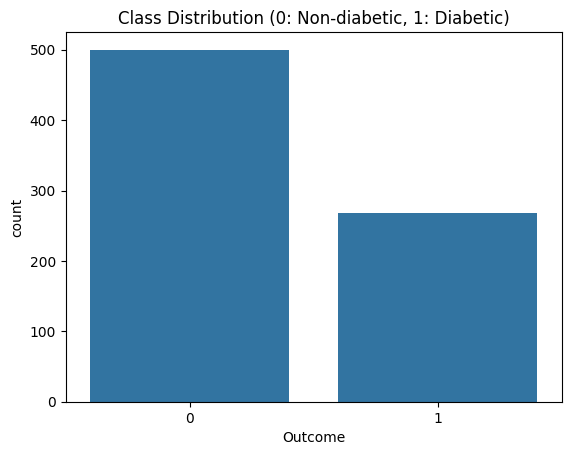

Percentage of diabetic cases: 34.90%


In [49]:

# Plot the count of each class in the 'Outcome' column
# 'Outcome' = 0 → Non-diabetic, 1 → Diabetic
sns.countplot(data=df, x='Outcome')
plt.title("Class Distribution (0: Non-diabetic, 1: Diabetic)")
plt.show()

# Percentage distribution
# Calculate the percentage of diabetic cases
# mean() works here because Outcome is binary (0/1)
diabetic_pct = df['Outcome'].mean() * 100
print(f"Percentage of diabetic cases: {diabetic_pct:.2f}%")

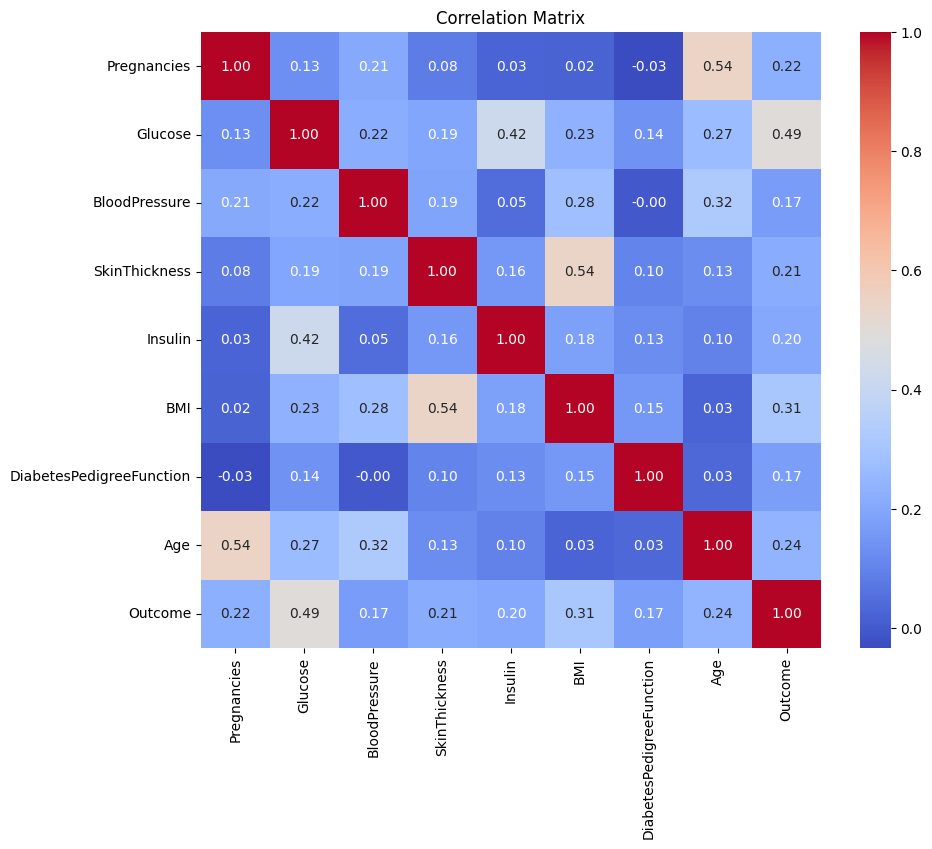

In [50]:
# Plot the correlation matrix to visualize pairwise correlations between features
# 'annot=True' shows correlation values on the heatmap
# 'cmap="coolwarm"' provides a diverging color scale to highlight positive/negative correlations
# 'fmt=".2f"' formats correlation values to 2 decimal places
# The heatmap helps identify strongly correlated variables which may indicate multicollinearity

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


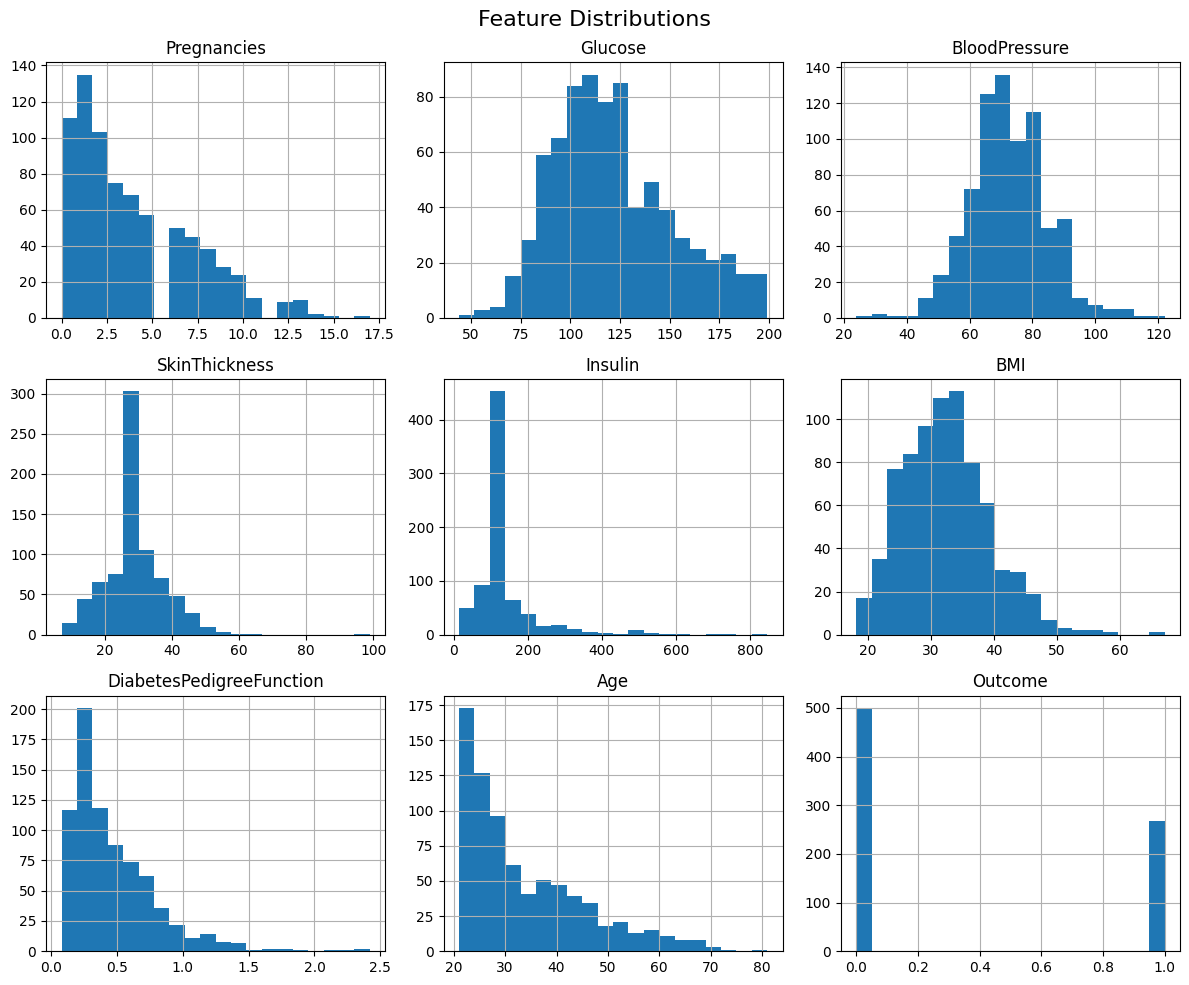

In [51]:
# Plot histograms for all numerical features to visualize their distributions
# figsize sets the overall plot size, bins specifies number of bins per histogram
# suptitle adds a main title for the entire figure, tight_layout avoids overlaps
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


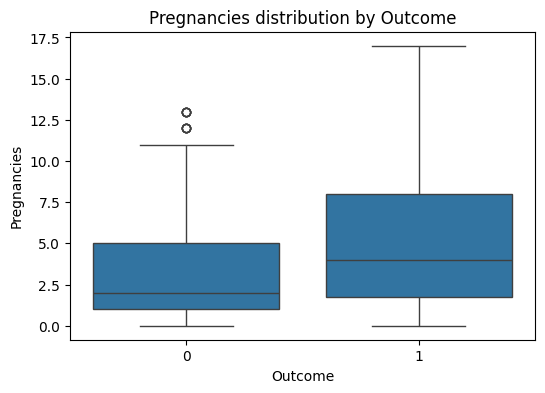

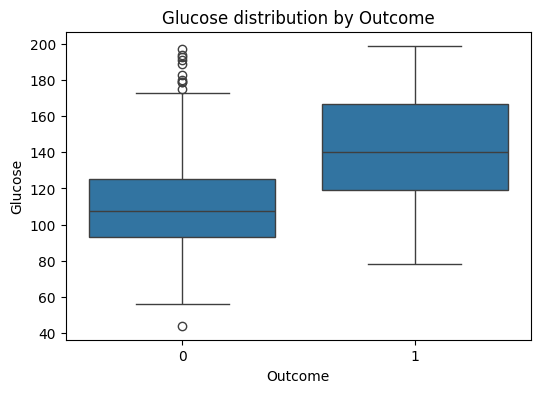

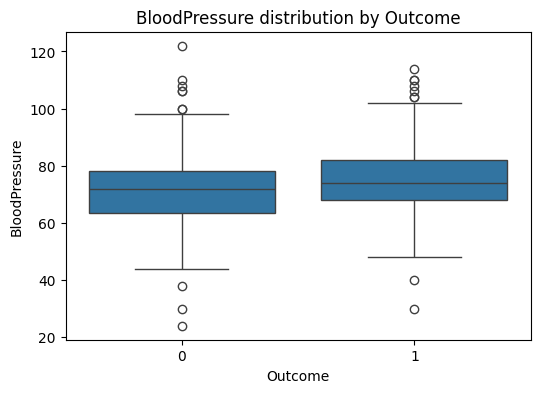

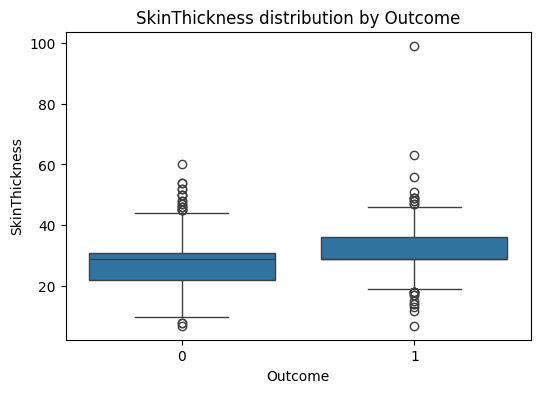

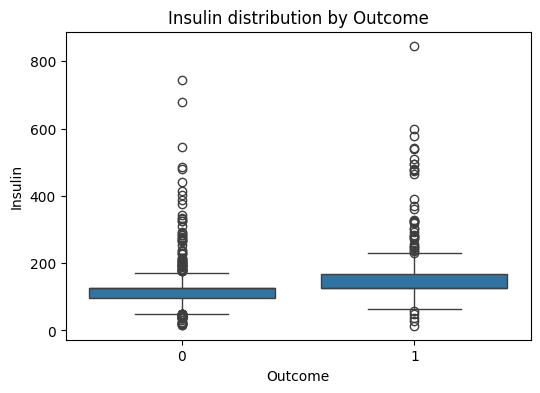

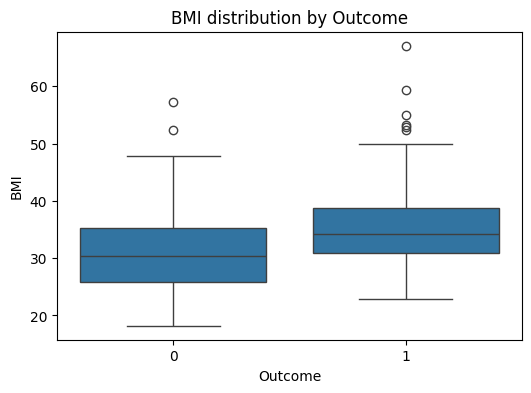

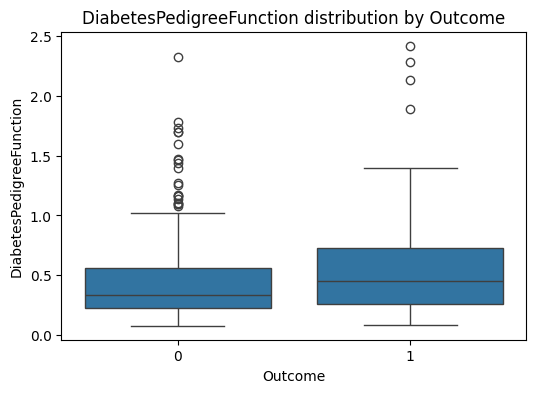

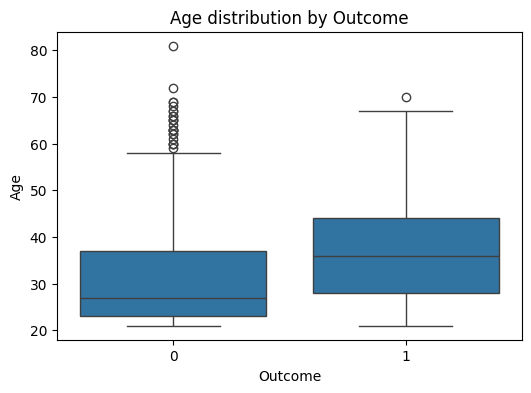

In [52]:
# Plot a boxplot for each feature (except the target column 'Outcome')
# to visualize the distribution of values grouped by Outcome.
# This helps identify differences in feature distributions between
# classes and spot potential outliers.

for col in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Outcome', y=col)
    plt.title(f"{col} distribution by Outcome")
    plt.show()


In [53]:
# Features and target
# Separate the dataset into features (X) and target variable (y).
# X contains all columns except 'Outcome', while y contains only the 'Outcome' column.
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

**Standardization**

In [54]:
# Feature scaling
# Standardize the feature set (X) so that each feature has mean = 0 and standard deviation = 1.
# This helps improve model performance and ensures all features are on the same scale.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Splitting the dataset**

In [55]:
# Train-test split
# Split the dataset into training and testing sets.
# - X_scaled, y: Features and target.
# - test_size=0.2 → 20% data for testing, 80% for training.
# - stratify=y → preserves the proportion of classes in both training and test sets.
# - random_state=42 → ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

**Handling Imbalance dataset by using SMOTE technique**

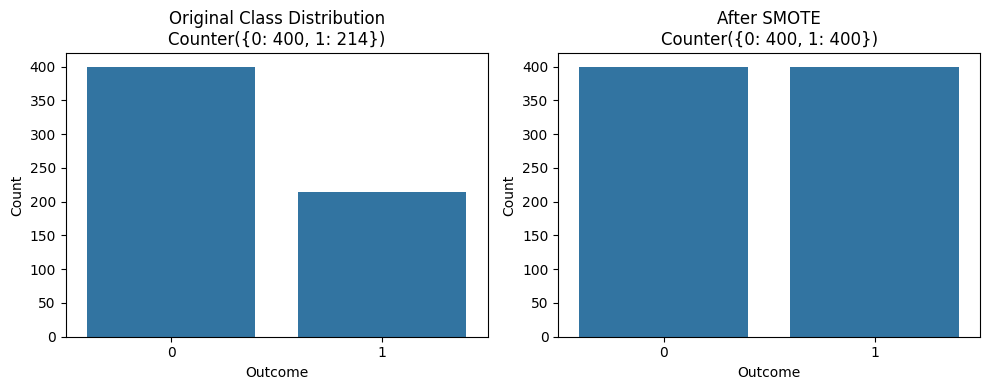

In [56]:
# Visualize the effect of SMOTE (Synthetic Minority Oversampling Technique) on class distribution.
plt.figure(figsize=(10,4))

# --- Original class distribution ---
# Create a subplot layout with 1 row and 2 columns for side-by-side comparison.
# First plot shows the class distribution before applying SMOTE,
# allowing us to see the imbalance between diabetic (1) and non-diabetic (0) cases.
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title(f'Original Class Distribution\n{Counter(y_train)}')
plt.xlabel("Outcome")
plt.ylabel("Count")

# --- Apply SMOTE ---
# SMOTE is used to generate synthetic examples for the minority class,
# helping to balance the dataset and improve model performance on minority cases.
# Here, it is applied only to the training set (X_train, y_train) to avoid data leakage.
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# --- Resampled class distribution ---
# Second plot shows the balanced class distribution after SMOTE.
# This confirms that the minority and majority classes now have equal representation.
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_res)
plt.title(f'After SMOTE\n{Counter(y_train_res)}')
plt.xlabel("Outcome")
plt.ylabel("Count")

# tight_layout() ensures plots don't overlap, and show() displays them.
plt.tight_layout()
plt.show()


**Perfoming Hyperparameter tuining and Cross Validation for random forest**

In [57]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid for the RandomForestClassifier.
# - 'n_estimators': number of trees in the forest (50, 100, 200).
# - 'max_depth': maximum depth of each tree (3, 5, 10, or None for unlimited depth).

# Initialize GridSearchCV to perform exhaustive search over the given hyperparameters.
# - RandomForestClassifier: Uses a random forest model with:
#       random_state=42 → ensures reproducible results.
#       class_weight='balanced' → adjusts weights inversely proportional to class frequencies
#                                 to handle class imbalance.
# - params: dictionary of parameters to search over.
# - cv=5: uses 5-fold cross-validation.
# - scoring='f1': optimization metric is F1-score (good for imbalanced classification problems).
params = {'n_estimators':[50,100,200], 'max_depth':[3,5,10,None]}
grid = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    params, cv=5, scoring='f1'
)
grid.fit(X_train_res, y_train_res)
print("Best RF params:", grid.best_params_)



Best RF params: {'max_depth': None, 'n_estimators': 200}


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Dictionary to store different classification models for training and evaluation
models = {
    # Logistic Regression model with higher max_iter to ensure convergence
    "Logistic Regression": LogisticRegression(max_iter=1000),

    # Random Forest model with 200 trees and a fixed random_state for reproducibility
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),

    # Support Vector Machine model with probability=True to allow probability predictions
    "SVM": SVC(probability=True),

    # Tuned XGBoost model with best parameters
    "XGBoost": XGBClassifier(
        colsample_bytree=0.8,
        learning_rate=0.01,
        max_depth=7,
        n_estimators=100,
        subsample=1.0,
        random_state=42,
        eval_metric="logloss",
        use_label_encoder=False,
        scale_pos_weight=len(y_train_res[y_train_res == 0]) / len(y_train_res[y_train_res == 1])
    )
}

# Dictionary to store evaluation metrics for each model
results = {}

# Loop through each model in the dictionary
for name, model in models.items():

    # Train the model on the resampled (balanced) training data
    model.fit(X_train_res, y_train_res)

    # Predict class labels on the test set
    y_pred = model.predict(X_test)

    # Predict class probabilities on the test set (used for AUC score)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Store key evaluation metrics for each model in the results dictionary
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    }

    # Print detailed classification report for each model
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("AUC Score:", roc_auc_score(y_test, y_prob))



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       100
           1       0.59      0.69      0.63        54

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154

AUC Score: 0.8109259259259258

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       100
           1       0.63      0.72      0.67        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154

AUC Score: 0.8156481481481481

=== SVM ===
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       100
           1       0.60      0.69      0.64        54

    accuracy                           0.73       154
   

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:19:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       100
           1       0.64      0.78      0.70        54

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.77      0.77       154

AUC Score: 0.825925925925926


**Evaluating the models**

In [59]:
# LIME Interpretability (for Logistic Regression) ---
# Initialize a LIME Tabular Explainer for model interpretability.
# LIME (Local Interpretable Model-agnostic Explanations) explains individual predictions
# by approximating the model locally with a simpler interpretable model.
#
# Parameters:
# - training_data: The balanced/resampled training data (converted to NumPy array) used to help LIME
#   understand the feature distribution.
# - feature_names: Names of the features (all columns except the target).
# - class_names: Human-readable labels for the target classes (0 = Non-Diabetic, 1 = Diabetic).
# - mode: 'classification' since the model predicts discrete classes.
#
# This explainer will be used later to interpret predictions made by the Logistic Regression model
# on specific instances, helping to identify which features contributed most to the prediction.

lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_res),
    feature_names=df.columns[:-1],
    class_names=["Non-Diabetic", "Diabetic"],
    mode="classification"
)

In [60]:
# Select a specific test sample (row index i) from X_test to interpret using LIME
# LIME will perturb this instance, run it through the Logistic Regression model,
# and identify which features contribute most to predicting each class.
# predict_fn is the model's probability prediction function (predict_proba),
# so LIME can explain the class probabilities.
# show_in_notebook() will display an interactive HTML explanation in the Jupyter Notebook.

i = 0  # You can change the index
exp = lime_explainer.explain_instance(
    data_row=X_test[i],
    predict_fn=models["Logistic Regression"].predict_proba
)
exp.show_in_notebook()

In [61]:
pip install tensorflow


In [62]:
!pip install scikeras


**DL Model**

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4207 - loss: 0.7409 - val_accuracy: 0.7250 - val_loss: 0.6162
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6822 - loss: 0.6385 - val_accuracy: 0.4812 - val_loss: 0.6808
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7379 - loss: 0.5817 - val_accuracy: 0.4625 - val_loss: 0.7118
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7437 - loss: 0.5398 - val_accuracy: 0.5375 - val_loss: 0.7103
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7623 - loss: 0.4906 - val_accuracy: 0.5625 - val_loss: 0.6965
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7474 - loss: 0.4997 - val_accuracy: 0.5875 - val_loss: 0.7032
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7663 - loss: 0.4641 - val_accuracy: 0.6125 - val_loss: 0.7021
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7553 - loss: 0.4998 - val_accuracy: 0.6250 - val_loss: 0.6

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       100
           1       0.60      0.57      0.58        54

    accuracy                           0.71       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154

ROC-AUC: 0.8020370370370371


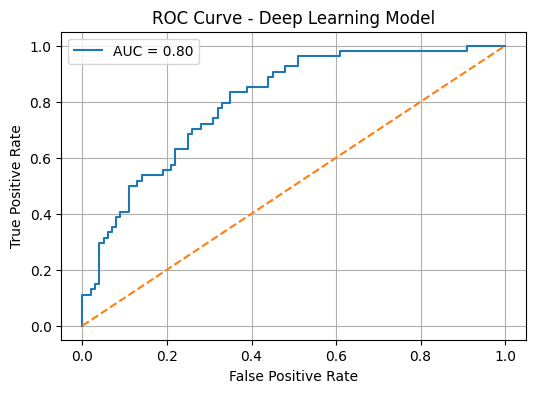

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# --- Step 1: Build the Model ---
# Creating a simple feedforward neural network using Keras Sequential API.
# - Input layer: matches the number of features in X_train_res.
# - First hidden layer: 64 neurons, ReLU activation for non-linearity.
# - Dropout layer (0.3): randomly drops 30% of connections to reduce overfitting.
# - Second hidden layer: 32 neurons, ReLU activation.
# - Dropout layer (0.2): drops 20% of connections to further prevent overfitting.
# - Output layer: 1 neuron with sigmoid activation for binary classification (outputs probability).
model = Sequential([
    Dense(64, input_shape=(X_train_res.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# --- Step 2: Compile the Model ---
# - Optimizer: Adam with a learning rate of 0.001 (adaptive learning for faster convergence).
# - Loss: binary crossentropy (standard for binary classification tasks).
# - Metric: accuracy (tracks performance during training and validation).

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# --- Step 3: Train the Model ---
# - Trained on the SMOTE-resampled dataset (X_train_res, y_train_res).
# - 50 epochs: number of full passes over the training data.
# - Batch size of 32: model updates weights after every 32 samples.
# - Validation split 0.2: 20% of training data used for validation each epoch.
# - verbose=1: prints training progress for each epoch.
history = model.fit(X_train_res, y_train_res,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# --- Step 4: Evaluate on Test Set ---
# - y_pred_proba: predicted probabilities for the positive class.
# - y_pred: converts probabilities to binary labels using a 0.5 threshold.
# - Prints classification report (precision, recall, F1-score) and ROC-AUC score.

y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

# --- Step 5: Plot ROC Curve ---
# - Calculates FPR (False Positive Rate) and TPR (True Positive Rate) across thresholds.
# - Plots ROC curve with the AUC value in the legend.
# - Adds a diagonal dashed line as the random baseline for comparison.

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Deep Learning Model")
plt.legend()
plt.grid()
plt.show()


In [64]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Store results
results = {}  # Dictionary to hold Accuracy and F1-score for each model

# --- Train and evaluate traditional ML models ---
# Looping over each predefined model in the 'models' dictionary:
# 1. Fit the model on the SMOTE-resampled training data.
# 2. Predict outcomes on the test set.
# 3. Calculate Accuracy and F1-score for performance evaluation.
# 4. Store the metrics in the 'results' dictionary for later comparison.
for name, clf in models.items():
    clf.fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {"Accuracy": acc, "F1-score": f1}

# --- Train and evaluate Neural Network ---
# The same deep learning model structure is used as before.
# - Compiles the model with Adam optimizer, binary crossentropy loss, and accuracy metric.
# - Fits the model for 10 epochs on the SMOTE-resampled dataset (shorter training for quick comparison).
# - Evaluates the model on the test set to get final accuracy.

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_res, y_train_res, epochs=10, batch_size=32, verbose=0)
nn_loss, nn_acc = model.evaluate(X_test, y_test, verbose=0)

# --- Predictions for Neural Network F1-score ---
# - Predicts probabilities for the test set.
# - Converts probabilities to binary class predictions using a 0.5 threshold.
# - Calculates the F1-score and adds it to the results dictionary.
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)
nn_f1 = f1_score(y_test, y_pred_nn)
results["Neural Network"] = {"Accuracy": nn_acc, "F1-score": nn_f1}

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:19:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [65]:
# Convert the results dictionary into a DataFrame for easier readability,
# transpose it so models are shown as rows, and display the results.
df_results = pd.DataFrame(results).T
print(df_results)


                     Accuracy  F1-score
Logistic Regression  0.720779  0.632479
Random Forest        0.753247  0.672414
SVM                  0.727273  0.637931
XGBoost              0.766234  0.700000
Neural Network       0.714286  0.607143


**Best Model - XGBOOST**

XGBoost is the best model overall because it has the highest accuracy (0.7662) and the highest F1-score (0.7000) among all models.

Accuracy measures overall correctness, while F1-score balances precision and recall, which is especially important if your dataset is imbalanced.

The fact that XGBoost leads in both metrics shows it not only predicts more correctly overall but also maintains a better trade-off between false positives and false negatives.

In [66]:
# Define hyperparameter search grids for each model.
# These parameter ranges will be used by GridSearchCV for tuning:
# - Logistic Regression: varying regularization strength 'C' (smaller → stronger regularization),
#   fixed 'l2' penalty, and 'lbfgs' solver for optimization.
# - Random Forest: tuning number of trees (n_estimators), maximum tree depth (max_depth),
#   and the minimum number of samples required to split an internal node (min_samples_split).
# - SVM: adjusting regularization strength 'C', kernel type ('linear' or 'rbf'),
#   and kernel coefficient 'gamma' (affects decision boundary curvature).

param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}


***Comparision of models***

In [68]:


# ================== BASE MODELS ==================
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(
        colsample_bytree=0.8,
        learning_rate=0.01,
        max_depth=7,
        n_estimators=100,
        subsample=1.0,
        random_state=42,
        eval_metric="logloss",
        use_label_encoder=False,
        scale_pos_weight=len(y_train_res[y_train_res == 0]) / len(y_train_res[y_train_res == 1])
    )
}


In [69]:
# ================== CROSS VALIDATION ==================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, model in base_models.items():
    print(f"--- Evaluating {name} ---")

    if name != "XGBoost":  # Run grid search for models with param grids
        grid = GridSearchCV(model, param_grids[name], cv=cv, scoring='f1', n_jobs=-1)
        grid.fit(X_train_res, y_train_res)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        # Use fixed XGBoost parameters
        best_model = model.fit(X_train_res, y_train_res)
        best_params = "Predefined"

    # Predictions on test set
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[name] = {"Best Params": best_params, "Accuracy": acc, "F1-score": f1}

--- Evaluating Logistic Regression ---
--- Evaluating Random Forest ---
--- Evaluating SVM ---
--- Evaluating XGBoost ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:25:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [70]:
# ================== RESULTS TABLE ==================
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)

# Sort by F1-score
results_df = results_df.sort_values(by="F1-score", ascending=False)
print("\nSorted by F1-score:")
print(results_df)


Model Comparison:
                                                           Best Params  \
Logistic Regression    {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}   
Random Forest        {'max_depth': None, 'min_samples_split': 5, 'n...   
SVM                       {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}   
XGBoost                                                     Predefined   

                     Accuracy  F1-score  
Logistic Regression  0.701299  0.610169  
Random Forest        0.733766  0.643478  
SVM                  0.688312  0.586207  
XGBoost              0.766234       0.7  

Sorted by F1-score:
                                                           Best Params  \
XGBoost                                                     Predefined   
Random Forest        {'max_depth': None, 'min_samples_split': 5, 'n...   
Logistic Regression    {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}   
SVM                       {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}   

        

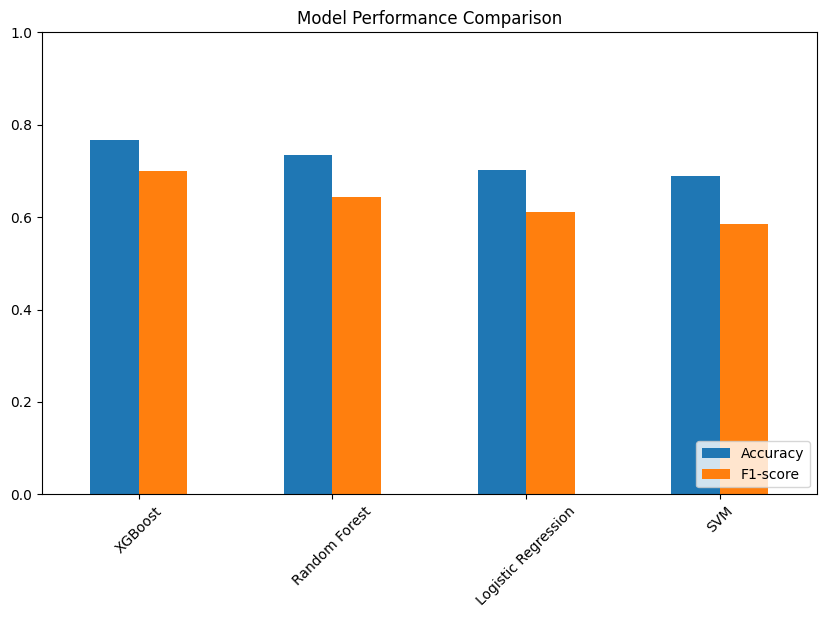

In [71]:
# ================== VISUALIZATION ==================
results_df[['Accuracy', 'F1-score']].plot(kind='bar', figsize=(10,6))
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.legend(loc="lower right")
plt.show()